In [216]:
import numpy as np

import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
from torch.nn import Linear 

# from torchviz import make_dot
from torchsummary import summary


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import silhouette_score

from scipy.spatial import distance
from scipy.spatial.distance import cdist

%matplotlib inline

In [3]:
def tensor_from_numpy(x, device):
    return torch.from_numpy(x).to(device)

def plot_loss_with_acc(loss_history, val_acc_history):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(range(len(loss_history)), loss_history,
             c=np.array([255, 71, 90]) / 255.)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training Loss ')
    plt.show() 
    
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

labelList=pd.read_csv('../data/label.csv',header=None)[1]
for i in range(0,len(labelList)):
    labelList[i]+=1
    
    
idx0 = np.where(np.array(labelList)==0)
idx1 = np.where(np.array(labelList)==1)
idx2 = np.where(np.array(labelList)==2)
idx3 = np.where(np.array(labelList)==3)
idx4 = np.where(np.array(labelList)==4)
idx5 = np.where(np.array(labelList)==5)
idx6 = np.where(np.array(labelList)==6)
idx7 = np.where(np.array(labelList)==7)
idx8 = np.where(np.array(labelList)==8)
idx9 = np.where(np.array(labelList)==9)
idx10 = np.where(np.array(labelList)==10)
idx11 = np.where(np.array(labelList)==11) 

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [243]:
node_feature = np.load('../data/X_np/X.npy')
node_feature2= np.zeros(shape=[850,1879],dtype=np.float32)
node_feature2[:,0:256]=node_feature[:, 0:256]

for i in range(0,850):
    for j in range(0,1623):
        try:
            node_feature2[i][j+256]=max(node_feature[i,256+5*j: 256+j*5+5]) 
        except:
            print(j)
            break
            


node_feature2/=node_feature2.sum(1, keepdims=True)   
node_feature2.shape

metebat2_idx=np.load('../data/metabat2_result/useful_idx.npy')
maxbin2_idx=np.load('../data/maxbin2_result/useful_idx.npy')

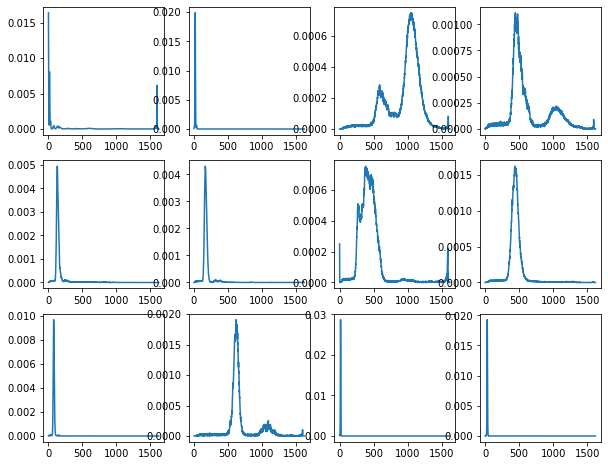

0 17 1049 444
130 165 384 440
77 619 14 30


In [59]:
# 查看 coverage 的分布  

node_feature3= np.zeros(shape=[850,1623],dtype=np.float32)
node_feature3[:,0:1623]=node_feature2[:, 256:1879]

 
node_feature3.shape

plot_x=[i  for i in range(0,node_feature3.shape[1])]

for j in range(0,12):
    locals()['plot_y{0}'.format(j)] = [0 for i in range(0,node_feature3.shape[1] )]
    
     
for i in  idx0[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y0[j]+=node_feature3[i][j]
plot_y0=[x / len(idx0[0]) for x in plot_y0]

            
for i in  idx1[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y1[j]+=node_feature3[i][j]
plot_y1=[x / len(idx1[0]) for x in plot_y1]

for i in  idx2[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y2[j]+=node_feature3[i][j]
plot_y2=[x / len(idx2[0]) for x in plot_y2]

for i in  idx3[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y3[j]+=node_feature3[i][j]
plot_y3=[x / len(idx3[0]) for x in plot_y3] 
            
for i in  idx4[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y4[j]+=node_feature3[i][j]
plot_y4=[x / len(idx4[0]) for x in plot_y4]

for i in  idx5[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y5[j]+=node_feature3[i][j]
plot_y5=[x / len(idx5[0]) for x in plot_y5]

for i in  idx6[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y6[j]+=node_feature3[i][j]
plot_y6=[x / len(idx6[0]) for x in plot_y6] 
            
for i in  idx7[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y7[j]+=node_feature3[i][j]
plot_y7=[x / len(idx7[0]) for x in plot_y7] 

for i in  idx8[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y8[j]+=node_feature3[i][j]
plot_y8=[x / len(idx8[0]) for x in plot_y8] 
        
for i in  idx9[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y9[j]+=node_feature3[i][j]
plot_y9=[x / len(idx9[0]) for x in plot_y9] 
            
for i in  idx10[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y10[j]+=node_feature3[i][j]
plot_y10=[x / len(idx10[0]) for x in plot_y10]

for i in  idx11[0] :
    for j in range(0,node_feature3.shape[1]):
        plot_y11[j]+=node_feature3[i][j]
plot_y11=[x / len(idx11[0]) for x in plot_y11]
            
fig,ax=plt.subplots(3,4,figsize=[10,8])
    
ax[0][0].plot(plot_x,plot_y0 )
ax[0][1].plot(plot_x,plot_y1 )    
ax[0][2].plot(plot_x,plot_y2 )
ax[0][3].plot(plot_x,plot_y3 )    
ax[1][0].plot(plot_x,plot_y4 )
ax[1][1].plot(plot_x,plot_y5 )    
ax[1][2].plot(plot_x,plot_y6 )
ax[1][3].plot(plot_x,plot_y7 )      
ax[2][0].plot(plot_x,plot_y8 )
ax[2][1].plot(plot_x,plot_y9 )    
ax[2][2].plot(plot_x,plot_y10 )
ax[2][3].plot(plot_x,plot_y11 )  

plt.show() 

 
print(plot_y0.index(max(plot_y0)), plot_y1.index(max(plot_y1)),plot_y2.index(max(plot_y2)),plot_y3.index(max(plot_y3)))
print(plot_y4.index(max(plot_y4)), plot_y5.index(max(plot_y5)),plot_y6.index(max(plot_y6)),plot_y7.index(max(plot_y7)))
print(plot_y8.index(max(plot_y8)), plot_y9.index(max(plot_y9)),plot_y10.index(max(plot_y10)),plot_y11.index(max(plot_y11))) 
 

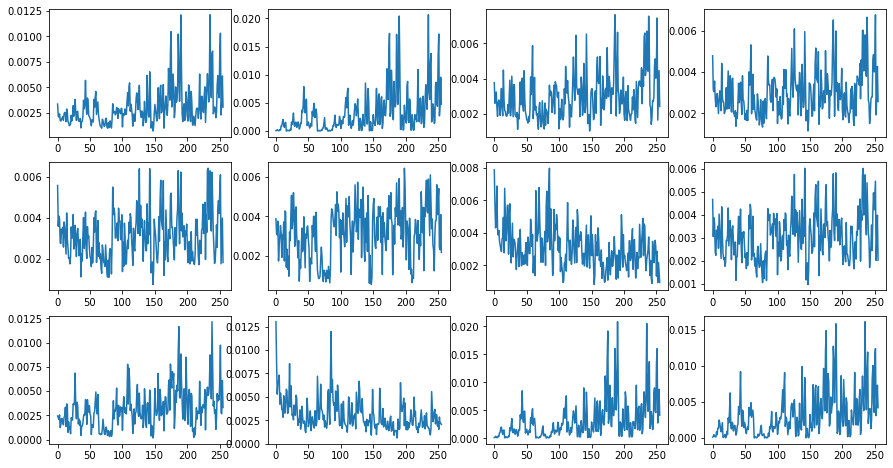

235 235 186 251
232 198 85 142
238 0 190 235


In [60]:
# 查看 kmer(4-mer) 的分布  

node_feature4= np.zeros(shape=[850,256],dtype=np.float32)
node_feature4[:,0:256]=node_feature2[:, 0:256]


plot_x=[i  for i in range(0,node_feature4.shape[1])]

for j in range(0,12):
    locals()['plot_y{0}'.format(j)] = [0 for i in range(0,node_feature4.shape[1] )]
    
     
for i in  idx0[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y0[j]+=node_feature4[i][j]
plot_y0=[x / len(idx0[0]) for x in plot_y0]

            
for i in  idx1[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y1[j]+=node_feature4[i][j]
plot_y1=[x / len(idx1[0]) for x in plot_y1]

for i in  idx2[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y2[j]+=node_feature4[i][j]
plot_y2=[x / len(idx2[0]) for x in plot_y2]

for i in  idx3[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y3[j]+=node_feature4[i][j]
plot_y3=[x / len(idx3[0]) for x in plot_y3] 
            
for i in  idx4[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y4[j]+=node_feature4[i][j]
plot_y4=[x / len(idx4[0]) for x in plot_y4]

for i in  idx5[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y5[j]+=node_feature4[i][j]
plot_y5=[x / len(idx5[0]) for x in plot_y5]

for i in  idx6[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y6[j]+=node_feature4[i][j]
plot_y6=[x / len(idx6[0]) for x in plot_y6] 
            
for i in  idx7[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y7[j]+=node_feature4[i][j]
plot_y7=[x / len(idx7[0]) for x in plot_y7] 

for i in  idx8[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y8[j]+=node_feature4[i][j]
plot_y8=[x / len(idx8[0]) for x in plot_y8] 
        
for i in  idx9[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y9[j]+=node_feature4[i][j]
plot_y9=[x / len(idx9[0]) for x in plot_y9] 
            
for i in  idx10[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y10[j]+=node_feature4[i][j]
plot_y10=[x / len(idx10[0]) for x in plot_y10]

for i in  idx11[0] :
    for j in range(0,node_feature4.shape[1]):
        plot_y11[j]+=node_feature4[i][j]
plot_y11=[x / len(idx11[0]) for x in plot_y11]
            
fig,ax=plt.subplots(3,4,figsize=[15,8])
    
ax[0][0].plot(plot_x,plot_y0 )
ax[0][1].plot(plot_x,plot_y1 )    
ax[0][2].plot(plot_x,plot_y2 )
ax[0][3].plot(plot_x,plot_y3 )    
ax[1][0].plot(plot_x,plot_y4 )
ax[1][1].plot(plot_x,plot_y5 )    
ax[1][2].plot(plot_x,plot_y6 )
ax[1][3].plot(plot_x,plot_y7 )      
ax[2][0].plot(plot_x,plot_y8 )
ax[2][1].plot(plot_x,plot_y9 )    
ax[2][2].plot(plot_x,plot_y10 )
ax[2][3].plot(plot_x,plot_y11 )  

plt.show() 

 
print(plot_y0.index(max(plot_y0)), plot_y1.index(max(plot_y1)),plot_y2.index(max(plot_y2)),plot_y3.index(max(plot_y3)))
print(plot_y4.index(max(plot_y4)), plot_y5.index(max(plot_y5)),plot_y6.index(max(plot_y6)),plot_y7.index(max(plot_y7)))
print(plot_y8.index(max(plot_y8)), plot_y9.index(max(plot_y9)),plot_y10.index(max(plot_y10)),plot_y11.index(max(plot_y11))) 

In [101]:
tensor_x = tensor_from_numpy(node_feature2, DEVICE)



# train_mask=[True for i in range(0,850)]
# tensor_train_mask = tensor_from_numpy(np.array(train_mask), DEVICE )

In [102]:
class AutoEncoder(nn.Module):

    def __init__(self, input_dim):
        super(AutoEncoder,self).__init__()
 
        self.linear1=nn.Linear(input_dim,400)
        self.linear2=nn.Linear(400,150)
        self.linear3=nn.Linear(150,36)
        self.linear4=nn.Linear(36,150)
        self.linear5=nn.Linear(150,400)
        self.linear6=nn.Linear(400,input_dim)
        
    
    def forward(self, feature):
        self.h1 = F.relu(self.linear1( feature))
        self.h1 = F.normalize(self.h1)
        
        self.h2  = F.sigmoid(self.linear2(self.h1))
        self.h2 = F.normalize(self.h2)

        self.h3 = F.relu(self.linear3( self.h2))
        self.h3 = F.normalize(self.h3)

        self.h4  = F.sigmoid(self.linear4( self.h3))
        self.h4 = F.normalize(self.h4)

        self.h5  = F.relu(self.linear5( self.h4))
        self.h5 = F.normalize(self.h5)
        
        self.h6  = self.linear6( self.h5)
 
        return  self.h6


In [103]:
# 超参数定义
LEARNING_RATE = 0.001
WEIGHT_DACAY = 1e-4
EPOCHS = 8
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [104]:
# 训练主体函数
def train():
    loss_history = []
    val_acc_history = []
    model.train()
 
    for epoch in range(EPOCHS):
         
        logits = model(tensor_x)  # 前向传播
        
        loss = criterion(logits, tensor_x)
        optimizer.zero_grad()
        loss.backward()     # 反向传播计算参数的梯度
        optimizer.step()    # 使用优化方法进行梯度更新
 
        loss_history.append(loss.item())
 
    return loss_history, model.h3, model.h4

In [105]:
# 模型定义：Model, Loss, Optimizer
model = AutoEncoder(tensor_x.shape[1]).to(DEVICE)
criterion=nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), 
                       lr=LEARNING_RATE, 
                       weight_decay=WEIGHT_DACAY)

C:\Users\Chester_Zhang\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[0.001637797337025404, 0.0010451936395838857, 0.000639361038338393, 0.00037403343594633043, 0.00020796952594537288, 0.00010924566595349461, 5.511265771929175e-05, 2.938908255600836e-05]


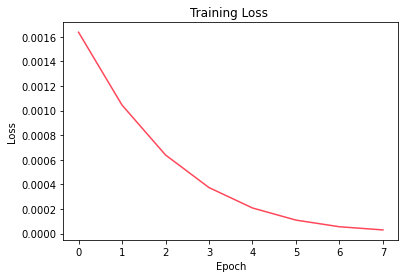

In [106]:
loss,feature_layer, rec_X = train()
 
print(loss)
plot_loss_with_acc(loss, [])

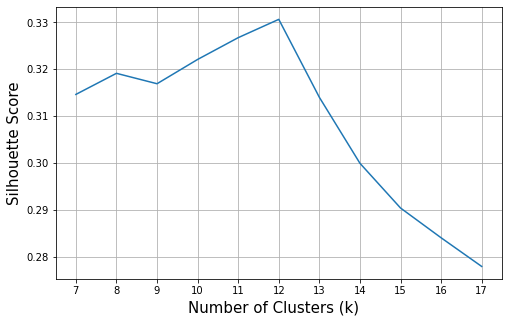

[0.31462760388851163, 0.31912719547748564, 0.3169070643186569, 0.3220879963040352, 0.3267348685860634, 0.3306399348378182, 0.31401013702154157, 0.29993818670511246, 0.29039875268936155, 0.2840483224391937, 0.27793274164199827]


In [213]:
# deternmine best k for kmeans

feature_np =np.load("../data/my_auto_encoder/feacture_np.npy") # laod previous stored data 
 
distorsions = [0 for i in range(7,18)]
for i in range(0,100):
    for k in range(7, 18):
        kmeans = KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(feature_np)
        distorsions[k-7]+= (silhouette_score(feature_np,kmeans.labels_))
 
distorsions=[d/100 for d in distorsions]

fig = plt.figure(figsize=(8, 5))
plt.plot(range(7, 18), distorsions)
plt.grid(True)
 

plt.xlabel('Number of Clusters (k)  ',fontsize=15)
plt.ylabel('Silhouette Score',fontsize=15)

ax=plt.gca()

x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

print(distorsions)

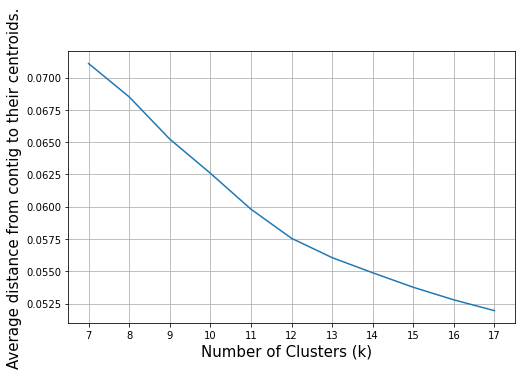

[0.07108774258570892, 0.0685063373674908, 0.06523576235700052, 0.06259231536057404, 0.05980930414240719, 0.05755222946359928, 0.05605601109456911, 0.05488335513829105, 0.05375854204449485, 0.05278520254958656, 0.05194807048849519]


In [222]:
feature_np =np.load("../data/my_auto_encoder/feacture_np.npy") # laod previous stored data 

distorsions = [0 for i in range(7,18)]
for i in range(0,100 ):
    for k in range(7, 18):
        kmeans = KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(feature_np)
        distorsions[k-7]+=(sum(np.min(cdist(feature_np, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / feature_np.shape[0])
 
distorsions=[d/100 for d in distorsions]

fig = plt.figure(figsize=(8, 5))
plt.plot(range(7, 18), distorsions)
plt.grid(True)
 

plt.xlabel('Number of Clusters (k)  ',fontsize=15)
plt.ylabel('Average distance from contig to their centroids.',fontsize=15)

ax=plt.gca()

x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()
print(distorsions)

##  Binning from all contigs

In [16]:
# feature_np=feature_layer.detach().numpy()
feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")  # laod previous stored data 


kmeans = KMeans(n_clusters=12,init='k-means++').fit(feature_np)
print('purity : ',purity_score(labelList,kmeans.labels_ ))
print('ARI : ',adjusted_rand_score(labelList,kmeans.labels_))
print('NMI : ',normalized_mutual_info_score(labelList,kmeans.labels_ ))
print('homogeneity : ',homogeneity_score(labelList,kmeans.labels_))
print('completeness : ',completeness_score(labelList,kmeans.labels_ ))

 

purity :  0.7623529411764706
ARI :  0.6216125913119311
NMI :  0.7084755423770303
homogeneity :  0.6849656421858421
completeness :  0.7336566516058265


## Use threshhold for each cluster, filter out outliers
 

In [189]:


feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")  # laod previous stored data 

kmeans = KMeans(n_clusters=12,init='k-means++').fit(feature_np)
print('purity : ',purity_score(labelList,kmeans.labels_ ))
print('ARI : ',adjusted_rand_score(labelList,kmeans.labels_))
print('NMI : ',normalized_mutual_info_score(labelList,kmeans.labels_ ))
print('homogeneity : ',homogeneity_score(labelList,kmeans.labels_))
print('completeness : ',completeness_score(labelList,kmeans.labels_ ))




purity :  0.7647058823529411
ARI :  0.6253938703876447
NMI :  0.7145612580995823
homogeneity :  0.6907779389881418
completeness :  0.7400406816505493


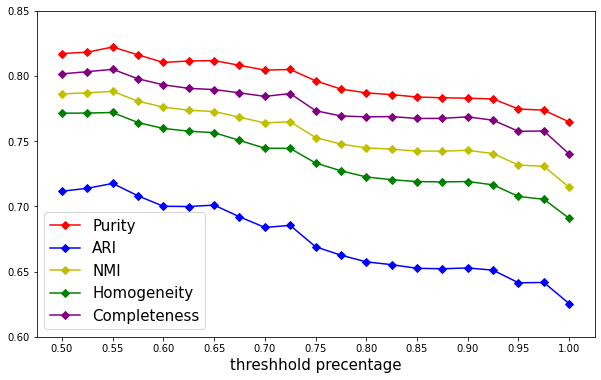

purity list :  [0.8171021377672208, 0.8181818181818182, 0.8221258134490239, 0.8161157024793388, 0.8102766798418972, 0.8114285714285714, 0.8117001828153565, 0.8080985915492958, 0.8044217687074829, 0.8049180327868852, 0.7962085308056872, 0.7898773006134969, 0.7869822485207101, 0.7856115107913669, 0.7838214783821479, 0.7831978319783198, 0.7828947368421053, 0.7823303457106274, 0.7745952677459527, 0.7737226277372263, 0.7647058823529411]
ARI  list :  [0.7115998856176231, 0.7138034047808228, 0.7175702244491601, 0.7080336661760731, 0.7000522046725628, 0.6998540293369138, 0.7009463765981431, 0.6919683081368583, 0.6838385267386106, 0.6853931812600247, 0.6690033855140478, 0.66254804031759, 0.6574589187714166, 0.655282259487472, 0.6525125608515454, 0.6521475726730375, 0.6527876080724597, 0.6510480882451142, 0.6414122106063036, 0.6416373569196103, 0.6253938703876447]
NMI  list :  [0.7861689191511807, 0.7870388024181134, 0.7881349346697831, 0.7806084159192733, 0.77606702977555, 0.7736602721612629, 0

In [210]:
# 获取每个label 的index
# print(kmeans.labels_ ) # 从 0 开始
feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")  # laod previous stored data 
# print(feature_np.shape)

label_0_idx=np.argwhere(kmeans.labels_ == 0 ) 
label_1_idx=np.argwhere(kmeans.labels_ == 1)
label_2_idx=np.argwhere(kmeans.labels_ == 2)
label_3_idx=np.argwhere(kmeans.labels_ == 3)
label_4_idx=np.argwhere(kmeans.labels_ == 4)
label_5_idx=np.argwhere(kmeans.labels_ == 5)
label_6_idx=np.argwhere(kmeans.labels_ == 6)
label_7_idx=np.argwhere(kmeans.labels_ == 7)
label_8_idx=np.argwhere(kmeans.labels_ == 8)
label_9_idx=np.argwhere(kmeans.labels_ == 9)
label_10_idx=np.argwhere(kmeans.labels_ == 10)
label_11_idx=np.argwhere(kmeans.labels_ == 11)

# print('=========')
# print(len(kmeans.labels_))
# print(len(label_0_idx)+len(label_1_idx)+len(label_2_idx)+len(label_3_idx)+len(label_4_idx)+len(label_5_idx)+len(label_6_idx)
#       +len(label_7_idx)+len(label_8_idx)+len(label_9_idx)+len(label_10_idx)+len(label_11_idx))
# print('============')

# 获取每一个contig 到它center的距离
dist_0_dict={}
for i in label_0_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_0_dict[distance.euclidean(feature_np[i],center)]=i
dist_0_list=sorted(dist_0_dict.items())

dist_1_dict={}
for i in label_1_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_1_dict[distance.euclidean(feature_np[i],center)]=i
dist_1_list=sorted(dist_1_dict.items())

dist_2_dict={}
for i in label_2_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_2_dict[distance.euclidean(feature_np[i],center)]=i
dist_2_list=sorted(dist_2_dict.items())

dist_3_dict={}
for i in label_3_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_3_dict[distance.euclidean(feature_np[i],center)]=i
dist_3_list=sorted(dist_3_dict.items())

dist_4_dict={}
for i in label_4_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_4_dict[distance.euclidean(feature_np[i],center)]=i
dist_4_list=sorted(dist_4_dict.items())

dist_5_dict={}
for i in label_5_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_5_dict[distance.euclidean(feature_np[i],center)]=i
dist_5_list=sorted(dist_5_dict.items())


dist_6_dict={}
for i in label_6_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_6_dict[distance.euclidean(feature_np[i],center)]=i
dist_6_list=sorted(dist_6_dict.items())

dist_7_dict={}
for i in label_7_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_7_dict[distance.euclidean(feature_np[i],center)]=i
dist_7_list=sorted(dist_7_dict.items())

dist_8_dict={}
for i in label_8_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_8_dict[distance.euclidean(feature_np[i],center)]=i
dist_8_list=sorted(dist_8_dict.items())

dist_9_dict={}
for i in label_9_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_9_dict[distance.euclidean(feature_np[i],center)]=i
dist_9_list=sorted(dist_9_dict.items())


dist_10_dict={}
for i in label_10_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_10_dict[distance.euclidean(feature_np[i],center)]=i
dist_10_list=sorted(dist_10_dict.items())

dist_11_dict={}
for i in label_11_idx:
    label=kmeans.labels_[i]
    center=kmeans.cluster_centers_[label]
    dist_11_dict[distance.euclidean(feature_np[i],center)]=i
dist_11_list=sorted(dist_11_dict.items())

 
 
threshholds=[0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1.0]
purity_list=[]
ARI_list=[]
NMI_list=[]
homogeneity_list=[]
completeness_list=[]

silhouette_list=[]
for threshhold in threshholds  :
    
    threshhold_0_list=dist_0_list[0:int(threshhold*len(dist_0_list))]
    threshhold_1_list=dist_1_list[0:int(threshhold*len(dist_1_list))]
    threshhold_2_list=dist_2_list[0:int(threshhold*len(dist_2_list))]
    threshhold_3_list=dist_3_list[0:int(threshhold*len(dist_3_list))]
    threshhold_4_list=dist_4_list[0:int(threshhold*len(dist_4_list))]
    threshhold_5_list=dist_5_list[0:int(threshhold*len(dist_5_list))]
    threshhold_6_list=dist_6_list[0:int(threshhold*len(dist_6_list))]
    threshhold_7_list=dist_7_list[0:int(threshhold*len(dist_7_list))]
    threshhold_8_list=dist_8_list[0:int(threshhold*len(dist_8_list))]
    threshhold_9_list=dist_9_list[0:int(threshhold*len(dist_9_list))]
    threshhold_10_list=dist_10_list[0:int(threshhold*len(dist_10_list))]
    threshhold_11_list=dist_11_list[0:int(threshhold*len(dist_11_list))]
 
    threshhold_idx=[] 
    for (dist, idx) in threshhold_0_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_1_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_2_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_3_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_4_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_5_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_6_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_7_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_8_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_9_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_10_list:
        threshhold_idx.append(idx[0])
    for (dist, idx) in threshhold_11_list:
        threshhold_idx.append(idx[0])
        
 
    
    purity=0
    ARI=0
    NMI=0
    homoeneity=0
    completeness=0
    
 
    purity+=purity_score(labelList[threshhold_idx],kmeans.labels_[threshhold_idx] )
    ARI+=adjusted_rand_score(labelList[threshhold_idx],kmeans.labels_[threshhold_idx])
    NMI+=normalized_mutual_info_score(labelList[threshhold_idx],kmeans.labels_[threshhold_idx] )
    homoeneity+=homogeneity_score(labelList[threshhold_idx],kmeans.labels_[threshhold_idx])
    completeness+=completeness_score(labelList[threshhold_idx],kmeans.labels_[threshhold_idx] )
    
    silhouette_list.append( silhouette_score(feature_np[threshhold_idx] ,kmeans.labels_[threshhold_idx])) 

    purity_list.append(purity)
    ARI_list.append(ARI)
    NMI_list.append(NMI)
    homogeneity_list.append( homoeneity)
    completeness_list.append(completeness)
    
###################################################################################    

# print(len(purity_list),len(threshhold_list) )

fig = plt.figure(figsize=(10,6))

plt.plot(threshholds,purity_list,color='r',marker='D',label="Purity")
plt.plot(threshholds,ARI_list,color='b',marker='D',label="ARI")
plt.plot(threshholds,NMI_list,color='y',marker='D',label="NMI")
plt.plot(threshholds,homogeneity_list,color='green',marker='D',label="Homogeneity")
plt.plot(threshholds,completeness_list,color='purple',marker='D',label="Completeness")
# plt.plot(threshholds,silhouette_list,color='orange',marker='D',label="Silhouette score")

plt.legend(fontsize=15)

plt.xlabel('threshhold precentage',fontsize=15)
# plt.ylabel('path  length',fontsize=15)

ax=plt.gca()

x_major_locator=MultipleLocator(0.05)
ax.xaxis.set_major_locator(x_major_locator)

# plt.xlim(0,20)
plt.ylim(0.6,0.85)
 
plt.show()

print('purity list : ', purity_list) 
print('ARI  list : ',  ARI_list) 
print('NMI  list : ',  NMI_list)
print('homogeneity  list : ',  homogeneity_list)
print('completeness  list : ',  completeness_list)
print('silhouette list : ', silhouette_list)

##  Drop some contigs  which are also dropped by metabat2 

In [244]:
# feature_np=feature_layer.detach().numpy()
feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")  # laod previous stored data 

kmeans = KMeans(n_clusters=12,init='k-means++').fit(feature_np[metebat2_idx])
print('purity : ',purity_score(labelList[metebat2_idx],kmeans.labels_ ))
print('ARI : ',adjusted_rand_score(labelList[metebat2_idx],kmeans.labels_))
print('NMI : ',normalized_mutual_info_score(labelList[metebat2_idx],kmeans.labels_ ))
print('homogeneity : ',homogeneity_score(labelList[metebat2_idx],kmeans.labels_))
print('completeness : ',completeness_score(labelList[metebat2_idx],kmeans.labels_ ))


purity :  0.8
ARI :  0.6487893097148145
NMI :  0.7665816444123705
homogeneity :  0.7746612655553726
completeness :  0.7586688224718218


##  Drop some contigs  which are also dropped by maxbin2 

In [251]:
# feature_np=feature_layer.detach().numpy()
feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")  # laod previous stored data 

kmeans = KMeans(n_clusters=12,init='k-means++').fit(feature_np[maxbin2_idx])
print('purity : ',purity_score(labelList[maxbin2_idx],kmeans.labels_ ))
print('ARI : ',adjusted_rand_score(labelList[maxbin2_idx],kmeans.labels_))
print('NMI : ',normalized_mutual_info_score(labelList[maxbin2_idx],kmeans.labels_ ))
print('homogeneity : ',homogeneity_score(labelList[maxbin2_idx],kmeans.labels_))
print('completeness : ',completeness_score(labelList[maxbin2_idx],kmeans.labels_ ))


purity :  0.6888888888888889
ARI :  0.5065242782412442
NMI :  0.6329525005423771
homogeneity :  0.604188319114423
completeness :  0.6645923977390398


In [191]:
# torch.save(model, '../model/my_auto_encoder.pt')

In [257]:
summary(model, (850,1879))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 850, 400]            752,000
├─Linear: 1-2                            [-1, 850, 150]            60,150
├─Linear: 1-3                            [-1, 850, 36]             5,436
├─Linear: 1-4                            [-1, 850, 150]            5,550
├─Linear: 1-5                            [-1, 850, 400]            60,400
├─Linear: 1-6                            [-1, 850, 1879]           753,479
Total params: 1,637,015
Trainable params: 1,637,015
Non-trainable params: 0
Total mult-adds (M): 1.63
Input size (MB): 6.09
Forward/backward pass size (MB): 19.55
Params size (MB): 6.24
Estimated Total Size (MB): 31.89


C:\Users\Chester_Zhang\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 850, 400]            752,000
├─Linear: 1-2                            [-1, 850, 150]            60,150
├─Linear: 1-3                            [-1, 850, 36]             5,436
├─Linear: 1-4                            [-1, 850, 150]            5,550
├─Linear: 1-5                            [-1, 850, 400]            60,400
├─Linear: 1-6                            [-1, 850, 1879]           753,479
Total params: 1,637,015
Trainable params: 1,637,015
Non-trainable params: 0
Total mult-adds (M): 1.63
Input size (MB): 6.09
Forward/backward pass size (MB): 19.55
Params size (MB): 6.24
Estimated Total Size (MB): 31.89

In [ ]:
# np.save("../data/my_auto_encoder/feacture_np.npy",feature_np )
# np.save("../data/my_auto_encoder/rec_X.npy", rec_X.detach().numpy() )

In [ ]:
# class HalfAutoEncoder(nn.Module):
#     def __init__(self,linear4,linear5,linear6 ):
#         super(HalfAutoEncoder,self).__init__()
         
#         self.linear4= linear4
#         self.linear5= linear5
#         self.linear6= linear6
 
    
#     def forward(self, h3):
#         self.h4  = F.relu(self.linear4( h3))
#         self.h4 = F.normalize(self.h4)
        
#         self.h5  = F.sigmoid(self.linear5( self.h4))
#         self.h5 = F.normalize(self.h5)
        
#         self.h6  =  self.linear6(self.h5) 
  

#         return  self.h6

In [ ]:
# half_auto_encoder=HalfAutoEncoder(model.linear4, model.linear5, model.linear6 ).to(DEVICE)

In [ ]:
# torch.save(half_auto_encoder, '../model/half_auto_encoder.pt')